Author: JONATHAN POLYN                                                                               
Course: DSC-540                                                                                      
Project: KMeans Cluster Analysis

The data is pulled from Kaggle from the education, universities, and college tag. The data frame has 777 observations and 18 variables. I choose the dataset since it is suitable for practice cluster analysis, data visualization, management, and predictions.

In [95]:
#Importing the required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

Reading the dataset

In [38]:
getData = pd.read_csv(
    'C:\School\DSC-540\Topic 7 -  Unsupervised Learning\data.csv')

In [39]:
getData.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Getting the information and description of the data

In [4]:
getData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
getData.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Performing Exploring Data Analysis

<h3>Creating a scttered plot of grad_rate vs room_board </h3>

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


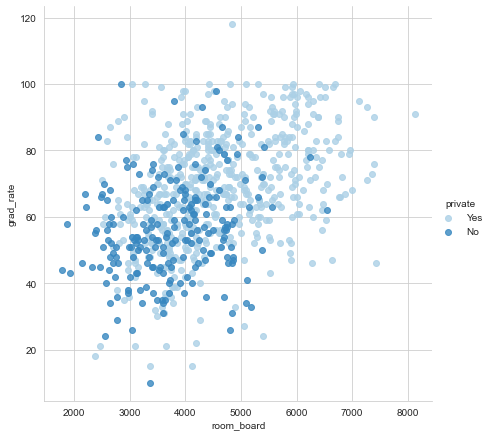

In [16]:
sns.set_style('whitegrid')
sns.lmplot('room_board',
           'grad_rate',
           data=getData,
           hue='private',
           palette='Blues',
           size=6,
           aspect=1,
           fit_reg=False)

<h3> Creating a scatted plot of f_undergrad and outstate </h3> 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


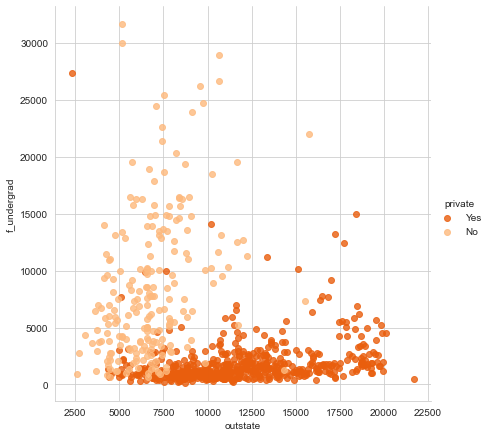

In [15]:
sns.set_style('whitegrid')
sns.lmplot('outstate',
           'f_undergrad',
           data=getData,
           hue='private',
           palette='Oranges_r',
           size=6,
           aspect=1,
           fit_reg=False)

<h3> Creating a stacked histogram based on the Private column to display grad_rate </h3>

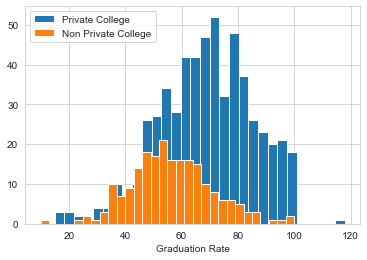

In [40]:
sns.set_style('whitegrid')

getData.loc[getData.private == 'Yes',
            'grad_rate'].hist(label="Private College", bins=30)
getData.loc[getData.private == 'No',
            'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

<h3> Get the private school that has a gradation rate higher than 100 </h3>

In [20]:
getData[getData['grad_rate']> 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<h3> Making the private school with over 100 be equal to 100 and then rerunning the histogram </h3>

In [41]:
getData.loc[getData.grad_rate > 100, 'grad_rate'] = 100

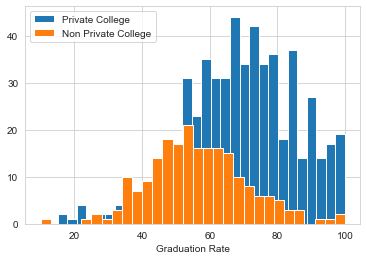

In [42]:
sns.set_style('whitegrid')


getData.loc[getData.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
getData.loc[getData.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

K Means Cluster Creation

<h4> Get the Number of parttime undergratuates (p_undergraduate) and grad_rate </h4>

In [63]:
p_grad_Rate = getData.iloc[:, [7,17]].values
p_grad_Rate

array([[ 537,   60],
       [1227,   56],
       [  99,   54],
       ...,
       [ 166,   49],
       [  83,   99],
       [1726,   99]], dtype=int64)

<h4> Get the Number of fulltime undergratuates (f_undergraduate) and grad_rate </h4>

In [74]:
f_grad_Rate = getData.iloc[:, [6,17]].values
f_grad_Rate

array([[2885,   60],
       [2683,   56],
       [1036,   54],
       ...,
       [2793,   49],
       [5217,   99],
       [2988,   99]], dtype=int64)

<h4> Using the elbow method to find the optimal number of clusters for Parttime Undergraduates </h4>

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


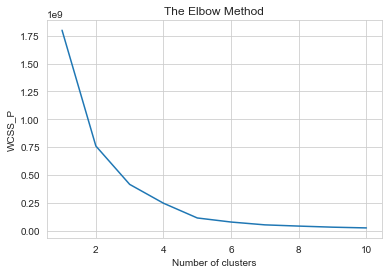

In [72]:
wcss_p = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(p_grad_Rate)
    wcss_p.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_p)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_P')
plt.show()

<h4> Using the elbow method to find the optimal number of clusters for Fulltime Undergraduates </h4>

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


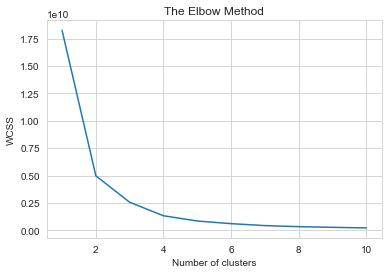

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(f_grad_Rate)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h4> Training the dataset for the parttime undergraduate </h4>

In [111]:
kmeans_p = KMeans(n_clusters=2, init='k-means++', random_state=42)
part_kmeans = kmeans_p.fit_predict(p_grad_Rate)

In [112]:
kmeans_f = KMeans(n_clusters=2, init='k-means++', random_state=42)
full_kmeans = kmeans_f.fit_predict(f_grad_Rate)

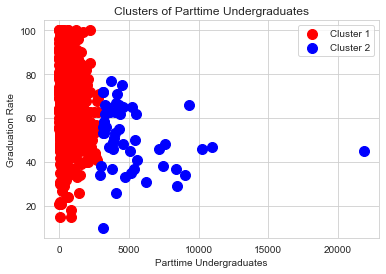

In [114]:
plt.scatter(p_grad_Rate[part_kmeans == 0, 0],
            p_grad_Rate[part_kmeans == 0, 1],
            s=100,
            c='red',
            label='Cluster 1')
plt.scatter(p_grad_Rate[part_kmeans == 1, 0],
            p_grad_Rate[part_kmeans == 1, 1],
            s=100,
            c='blue',
            label='Cluster 2')
plt.title('Clusters of Parttime Undergraduates')
plt.xlabel('Parttime Undergraduates')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()

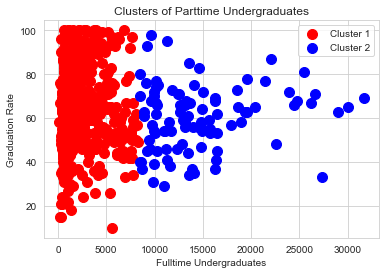

In [115]:
plt.scatter(f_grad_Rate[full_kmeans == 0, 0],
            f_grad_Rate[full_kmeans == 0, 1],
            s=100,
            c='red',
            label='Cluster 1')
plt.scatter(f_grad_Rate[full_kmeans == 1, 0],
            f_grad_Rate[full_kmeans == 1, 1],
            s=100,
            c='blue',
            label='Cluster 2')
plt.title('Clusters of Parttime Undergraduates')
plt.xlabel('Fulltime Undergraduates')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()

<h4> Locating the centroid of the parttime undergraduate </h4>

In [116]:
kmeans_p.cluster_centers_

array([[ 548.70661157,   66.44352617],
       [5219.7254902 ,   51.15686275]])

<h4> Locating the centroid of the fulltime undergraduate </h4>

In [117]:
kmeans_f.cluster_centers_

array([[ 2129.10014728,    66.20765832],
       [14583.35714286,    60.12244898]])